In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys



In [48]:
# ray casting function to check see if pixel is within the polygon
# looking for an specific aruco marker in the marker dict
def ray_casting_check(point_x , point_y):

        # define max system variable
        huge = sys.float_info.max

        # we start from outside of the polygon            
        # states variable declear
        inside = False
        
        # error check make sure the ID we passed in is detected
        #if id in self.marker_dict:
            

        # import all the object into an np array 
        #marker_corner_0 = np.array(self.marker_dict[id]['corner_0'] , dtype = np.int32)
        #marker_corner_0 = np.expand_dims(marker_corner_0 , axis = 0)
        #marker_corner_1 = np.array(self.marker_dict[id]['corner_1'] , dtype = np.int32)
        #marker_corner_1 = np.expand_dims(marker_corner_1 , axis = 0)
        #marker_corner_2 = np.array(self.marker_dict[id]['corner_2'] , dtype = np.int32)
        #marker_corner_2 = np.expand_dims(marker_corner_2 , axis = 0)
        #marker_corner_3 = np.array(self.marker_dict[id]['corner_3'] , dtype = np.int32)
        #marker_corner_3 = np.expand_dims(marker_corner_3 , axis = 0)

        # concatenate the numpy array as an single 2X4 array
        #marker_corner_np = np.concatenate((marker_corner_0 , marker_corner_1 , marker_corner_2 , marker_corner_3) , axis = 0)

        marker_corner_np = np.array([[20 ,  10],
                                     [50 , 125],
                                     [125,  90],
                                     [150,  20]])


        # pass corners into the sorting algorithms to get them in an rotation oriantation
        #marker_corner_np = self.__corner_sorting(marker_corner_np)
        #print(marker_corner_np)



        # loop though all the corners
        n = marker_corner_np.shape[0]

        for i in range(-1,n-1):

            # import the first two point
            p1x = marker_corner_np[i][0]
            p1y = marker_corner_np[i][1]
            p2x = marker_corner_np[i+1][0]
            p2y = marker_corner_np[i+1][1]

            # compare the y value to make sure p1y is the lower point
            if p1y > p2y:
                p1x , p1y , p2x , p2y = p2x , p2y , p1x , p1y 

            # check if the point is the same height as p1y and p2y
            #if point_y == p1y or point_y == p2y:

                # add an fraction on it to make sure when we calculate the intercept there will not be divided by 0
                #point_y = point_y + 0.001

            # check intercept on the horiztal ray casting
            if point_y > p1y and point_y < p2y:

                # this means it intercept with the first edge
                #inside = not inside

                # check the slope to make up the odd even times that the ray passing by
                # we default these to max because the slope of an function that is parallel to the y axis is infinity
                if p2x != p1x:
                    m_edge = (p2y - p1y) / (p2x - p1x)
                else:
                    m_edge = (p2y - p1y) / (p2x - p1x + 0.001)

                if point_x != p1x:
                    m_point = (point_y - p1y) / (point_x - p1x)

                else:
                    m_point = (point_y - p1y) / (point_x - p1x + 0.001)

                # check the slope to see we just need to make sure either one is bigger to get and odd number

                if m_point > m_edge and point_x < max(p1x, p2x):
                    inside = not inside


                    #print("intercept with " , i-1 ,  i)



            
        #else:
            #print("Marker not in class")


        return inside

In [44]:
marker_corner_np = np.array([[20 ,  10],
                             [50 , 125],
                             [125,  90],
                             [150,  10]])

point_x = 75
point_y = 50

status = ray_casting_check(50, 10)

print(status)

False


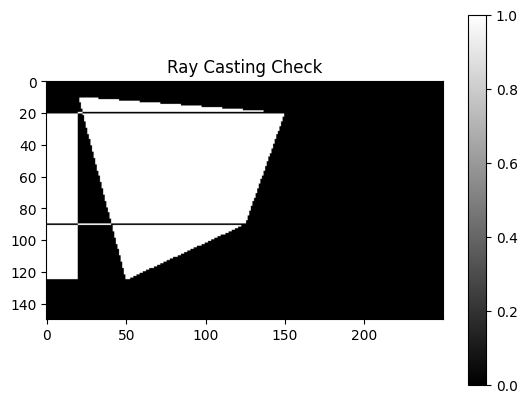

In [49]:
# scanning though all the 400 X 400 pixel point and display that in an heat plot

# define an 400x400 array
h_map = np.zeros((250, 150))

for i in range(250):
    for j in range(150):
        status = ray_casting_check(i , j)
        
        if status == True:
            h_map[i][j] = 1
            
h_map = np.transpose(h_map)
            
            
plt.imshow(h_map , cmap ="gray")
plt.colorbar()
plt.title('Ray Casting Check')
plt.show()
           